# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [236]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib

In [237]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # прочитаем файл csv и сохраним данные в таблицу df.

In [238]:
df.head(10) # напечатаем первые 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [239]:
df.shape # определим размер таблицы

(23699, 22)

In [240]:
df.info() #вызовtv метод info() для получения данных о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [241]:
df.isnull().sum() #проверка данных на наличие пропусков вызовом методов isnull() и sum() для суммирования пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [242]:
df.duplicated().sum() # подсчет количества дубликатов в df, вызов метода duplicated() и sum()

0

Подробнее рассмотрим, какие значения в столбцах. Применим различные методы к данным: value_counts() для определения наиболее часто встречающихся значений, unique() для определения уникальных значений.

In [243]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [244]:
df['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [245]:
df['ceiling_height'].unique() 

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [246]:
df['total_area'].value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

In [247]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [248]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [249]:
df['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
деревня Борисова Грива               1
поселок Тёсово-4                     1
посёлок Пансионат Зелёный Бор        1
деревня Пельгора                     1
деревня Кисельня                     1
Name: locality_name, Length: 364, dtype: int64

In [250]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Вывод

Исходные данные для анализа получены и изучены.

Таблица содержит 22 столбца и 23699 строк. Данные в столбцах трех типов: bool(2 столбца), float64(14столбцов), int64(3 столбца), object(3 столюца)

В данных отсутствуют дубликаты.

В таблице df есть пропуски значений в следующий столбцах:

* ceiling_height - 9195 пропусков;
* floors_total - 86 пропусков;
* living_area - 1903 пропуска;
* is_apartment - 20924 пропуска;
* kitchen_area - 2278 пропусков;
* balcony - 11519 пропусков;
* locality_name - 49 пропусков;
* airports_nearest - 5542 пропуска;
* cityCenters_nearest - 5519 пропусков;
* parks_around3000 - 5518 пропусков;
* parks_nearest - 15620 пропусков;
* ponds_around3000 - 5518 пропусков;
* ponds_nearest - 14589 пропусков;
* days_exposition - 3181 пропуск.

Проведено предварительное изучение данных. Применили следующие методы: value_counts() для определения наиболее часто встречающихся значений в столбцах, unique() для определения уникальных значений. 

### Шаг 2. Предобработка данных

#### 1) заполнение пропусков:

##### 1.1) Пропуски в количестве этажей 'floors_total' заполним значением ('floor' + 1):

In [251]:
df['floors_total'] = df['floors_total'].fillna(df['floor'] + 1) # вызовем метод replace, заменим пропуски в 'floors_total'

In [252]:
df['floors_total'].isnull().sum() # проверим, что все пропуски в 'floors_total' заполнены

0

##### 1.2) Пропуски в 'ceiling_height' заменим на значение медианы в зависимости от этажности домов:

In [253]:
df['ceiling_height_median'] = df.groupby('floors_total')['ceiling_height'].transform('median')

In [254]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height_median'])

In [255]:
df['ceiling_height'].isnull().sum() # проверим, что все пропуски в 'ceiling_height' заполнены

1

Остался незаполненным 1 пропуск. Это связано с тем, что для какого-то этажа все значения были пропущены. 
Найдем значение медианы для всего столбца 'ceiling_height' и заполним оставщийся пропуск на это значение.

In [256]:
ceiling_height_median = df['ceiling_height'].median() # определим значение медианы для столбца 'ceiling_height'

In [257]:
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median) # вызовем метод replace, заменим пропуски 
                                                                          # в 'ceiling_height'

In [258]:
df['ceiling_height'].isnull().sum()  # проверим, что больше не осталось пропусков в 'ceiling_height'

0

##### 1.3) Заполним пропуски в 'living_area'  и 'kitchen_area':

Найдем средний коэффициент соотношения жилой площади к общей в зависимости от количества комнат. Пропуски в 'living_area' заполним на значение общей площади умноженной на этот средний коэффициент.

In [259]:
coeff_living_area = (df['living_area'] / df['total_area']).groupby(df['rooms']).mean() 

In [260]:
coeff_living_area # распечатаем значения coeff_living_area

rooms
0     0.685467
1     0.485989
2     0.579287
3     0.625302
4     0.646489
5     0.641377
6     0.668819
7     0.657981
8     0.667001
9     0.612299
10    0.645065
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
dtype: float64

In [261]:
df['coeff_living_area'] = df['rooms'].apply(lambda x: coeff_living_area[x]) # вызовем метод apply и добавим в таблицу df столбец
                                                                # 'coeff_living_area' в зависимости от значения столбца 'rooms'

In [262]:
df.loc[df['living_area'].isnull(), 'living_area'] = df.loc[df['living_area'].isnull()].apply(
    lambda x: x['total_area'] * x['coeff_living_area'], axis=1)
    # пропуски в 'living_area' заменим на значение 'total_area' умноженной на средний коэф. соотнощения жилой площади к общей

In [263]:
df['living_area'].isnull().sum() # проверим, что все пропуски в 'living_area' заполнены

0

Аналогичным образом поступим с пропусками в столбце 'kitchen_area'. Найдем соотношение площади кухни к общей площади квартиры в зависимости от количества комнат.

In [264]:
coeff_kitchen_area = (df['kitchen_area'] / df['total_area']).groupby(df['rooms']).mean() # вызовем метод replace, 
                                                                    # заменим пропуски в 'ceiling_height' на значение медианы

In [265]:
coeff_kitchen_area # распечатаем значения coeff_kitchen_area

rooms
0          NaN
1     0.249906
2     0.174163
3     0.140928
4     0.124031
5     0.113455
6     0.104150
7     0.091932
8     0.091708
9     0.075054
10    0.088013
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
dtype: float64

In [266]:
df['coeff_kitchen_area'] = df['rooms'].apply(lambda x: coeff_kitchen_area[x]) # вызовем метод apply и добавим в таблицу df 
                                                     # столбец 'coeff_kitchen_area' в зависимости от значения столбца 'rooms'

In [267]:
df.loc[df['kitchen_area'].isnull(), 'kitchen_area'] = df.loc[df['kitchen_area'].isnull()].apply(
    lambda x: x['total_area'] * x['coeff_kitchen_area'], axis=1)
    # пропуски в 'kitchen_area' заменим на значение 'total_area' умноженной на средний коэф. соотнощения площади кухни к общей

In [268]:
df['kitchen_area'].isnull().sum() # проверим, все ли пропуски в 'kitchen_area' заполнены

197

Ни для одной квартиры с количеством комнат равных нулю не указана площадь кухни, поэтому 197 пропусков остались не заполненными.
Для заполнения оставшихся пропусков используем coeff_kitchen_area_1room - коэф. для однокомнатных квартир.

In [269]:
coeff_kitchen_area_1room = coeff_kitchen_area[1] # сохраним в переменной значение коэффицинта для однокомнатных квартир

In [270]:
df.loc[df['kitchen_area'].isnull(), 'kitchen_area'] = df.loc[df['kitchen_area'].isnull()].apply(
    lambda x: x['total_area'] * coeff_kitchen_area_1room, axis=1) # пропуски в 'kitchen_area' заменим на значение 'total_area' 
                                    #умноженной на средний коэф. соотнощения площади кухни к общей для однокомнатных квартир

In [271]:
df['kitchen_area'].isnull().sum() # проверим, что все пропуски в 'kitchen_area' заполнены

0

##### 1.4) Заполним пропуски в 'balcony' и 'is_apartment' :

Пропуски в 'balcony' — скорее всего говорит о том, что в квартире нет балкона. Такие пропуски заменим на 0.

Пропуски в 'is_apartment' - скорее всего говорит о том, что квартира не является апартаментами. Такие пропуски заменим на False. 

In [272]:
values= {'balcony':0, 'is_apartment':False} #словарь с заменяемыми значениями

df = df.fillna(value=values)

In [273]:
df['balcony'].isnull().sum() # проверим, что все пропуски в 'balcony' заполнены

0

In [274]:
df['is_apartment'].isnull().sum() # проверим, что все пропуски в 'is_apartment' заполнены

0

##### 1.5) Заполним пропуски в 'locality_name'

Пропуски в названии населенного пункта 'locality_name' заменим на 'Не определен'.

In [275]:
df['locality_name'] = df['locality_name'].fillna("Не определено") # вызовем метод replace, заменим пропуски в 'locality_name'

In [276]:
df['locality_name'].isnull().sum() # проверим, что все пропуски в 'locality_name' заполнены

0

##### 1.5) Заполним пропуски в 'cityCenters_nearest':

В названиях городов есть одинаковые города отличающиеся написанием с ё или е. Перед заменой пропусков в cityCenters_nearest заменим ё на е.

In [277]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')  

In [278]:
cityCenters_nearest_median = df.groupby('locality_name')['cityCenters_nearest'].median().sort_values(ascending=False)
cityCenters_nearest_median

locality_name
поселок Молодежное      65764.0
Зеленогорск             53381.0
Ломоносов               51677.0
Кронштадт               49575.0
поселок Репино          42896.5
                         ...   
село Путилово               NaN
село Рождествено            NaN
село Русско-Высоцкое        NaN
село Старая Ладога          NaN
село Шум                    NaN
Name: cityCenters_nearest, Length: 331, dtype: float64

In [279]:
#Функция, которая проверяет пустое ли поле cityCenters_nearest и если True, то возвращаем медиану, 
#а если False, то исходной значение

def replace_to_mean(row):
    if np.isnan(row['cityCenters_nearest']):
        return cityCenters_nearest_median[row['locality_name']]
    return row['cityCenters_nearest']
 
df['cityCenters_nearest'] = df.apply(replace_to_mean, axis=1)

Не для всех городов есть значение медианы, поэтому остальные пропуски заменим на большое значение-маркер. Ниже методом describe() получили максимальное значение для 'cityCenters_nearest' 65.9 км. В качестве значения-маркера возьмем 100 км, и оставшиеся пропуски заполним этим значением. 

In [280]:
df['cityCenters_nearest'].describe()

count    18835.000000
mean     14441.626812
std       8596.877057
min        181.000000
25%       9464.000000
50%      13261.000000
75%      16735.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [281]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(100000.0) # вызовем метод fillna, 
                                                                    #заменим пропуски в 'cityCenters_nearest' на значение-маркер

In [282]:
df['cityCenters_nearest'].isnull().sum() # проверим, что все пропуски в 'cityCenters_nearest' заполнены

0

##### 1.6) Какие пропуски оставим без заполнения:

Пропуски в days_exposition заполнить средними или медианой будет некорректно, оставим в исходном варианте.

Также не будем заполнять пропуски в столбцах: airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest т.к. они не потребуются для последующего анализа


 #### 2) приведем данные к нужным типам:

Заменим вещественный тип данных на целочисленный для следующих столбцов: 

* 'floors_total', 'balcony'-  количество этажей в доме и количество балконов в квартире - это целые числа. 

* 'cityCenters_nearest' - расстояние в метрах, также можно привести к целочисленному типу данных, также переведем значения в км. 

* 'last_price' - цена квартиры в рублях целое число.

* 'days_exposition' - количество дней, также целые числа, приведем данные в столбце к типу данных Int64 (Int 64 -  с большой буквы, т.к. есть пропуски).

Значения в столбцах 'total_area', 'living_area', 'kitchen_area' - оставим тип данных float64, т.к. площади могут быть не целыми числами.

In [283]:
df['floors_total'] = df['floors_total'].astype('int') # вызовем метод astype для преобразования 'float64' в 'int'

In [284]:
df['balcony'] = df['balcony'].astype('int')

In [285]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

Также расчитаем расстояние до центра в км и добавим эти данные в таблицу. Тип данных в столбце приведем к int64.
Для расстояний меньше 1000 м, при переводе в км, получаются нули, поэтому применим функцию ниже: 

In [286]:
#Функция возвращает значение расстояния до центра равное 1км, если cityCenters_km меньше 1.
def cityCenters_round (cityCenters_nearest):
    cityCenters_km = cityCenters_nearest/1000
    if cityCenters_km < 1:
        return 1
    return cityCenters_km

df['cityCenters_nearest_km'] = df['cityCenters_nearest'].apply(cityCenters_round).astype('int')

In [287]:
df['last_price'] = df['last_price'].astype('int')

In [288]:
df['days_exposition'] = df['days_exposition'].round().astype('Int64') # 'Int 64' - с большой буквы, т.к. есть пропуски

In [289]:
df.info()  # проверим тип данных в df после преобразования 'float64' в 'int64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images              23699 non-null int64
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null object
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23699 non-null int64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23699 non-null float64
balcony                   23699 non-null int64
locality_name             23699 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       23699 non-null int64
parks_around3000          18181 non-null float64
parks_nearest             8079 non

### Выводы_шаг 2 :

1) Выполнена замена пропусков в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, cityCenters_nearest.

2) Заменен тип данных на целочисленный для следующих столбцов: 'floors_total', 'balcony', 'cityCenters_nearest', 'last_price', 'days_exposition'

3) Для столбцов: airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, нельязя определить подходящую замену, поэтому пропуски оставили незаполненными. Также эти данные не потребуются для последующего анализа.

### Шаг 3. Посчитайте и добавьте в таблицу


Посчитаем следующие значения и добавим их в таблицу:

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры: варианты — первый, последний, другой;
* соотношение жилой и общей площади; 
* соотношение отношение площади кухни к общей.

In [290]:
df['price_for_m2'] = df['last_price'] / df['total_area'] # добавим в df столбец 'price_for_m2', в котором расчитаем
                                                            # отношение стоимости квартиры и общей площади квартиры

In [291]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
    #вызовем методом to_datetime(),который переводит строки в даты

In [292]:
df['weekday'] = df['first_day_exposition'].dt.weekday # вызов метода dt.weekday для опр-ия номера дня недели

In [293]:
df['month'] = df['first_day_exposition'].dt.month # вызов метода dt.month для опр-ия месяца

In [294]:
df['year'] =  df['first_day_exposition'].dt.year # вызов метода dt.year для опр-ия года

In [295]:
# Фукнция для присвоения значения 'первый', 'последний', 'другой' в зависимости от этажа квартиры и этажности дома
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    
    if row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

df['floor_group'] = df.apply(floor_group,  axis = 1)

In [296]:
df['living_area_ratio'] = df['living_area'] / df['total_area'] # соотношение жилой и общей площади; 

In [297]:
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] # соотношение площади кухни и общей площади; 

Также расчитаем среднюю цену для каждого километра расстояния до центра. Эти данные будут необходимы при проведении исследовательского анализа.

In [298]:
df['price_per_km'] = df['last_price'] / df['cityCenters_nearest_km'] # цена за км 

In [299]:
df['price_per_km'] = df['price_per_km'].astype('int') #приведем тип данных к 'int64'

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 34 columns):
total_images              23699 non-null int64
last_price                23699 non-null int64
total_area                23699 non-null float64
first_day_exposition      23699 non-null datetime64[ns]
rooms                     23699 non-null int64
ceiling_height            23699 non-null float64
floors_total              23699 non-null int64
living_area               23699 non-null float64
floor                     23699 non-null int64
is_apartment              23699 non-null bool
studio                    23699 non-null bool
open_plan                 23699 non-null bool
kitchen_area              23699 non-null float64
balcony                   23699 non-null int64
locality_name             23699 non-null object
airports_nearest          18157 non-null float64
cityCenters_nearest       23699 non-null int64
parks_around3000          18181 non-null float64
parks_nearest             

### Выводы_шаг 3:

Рассчитали и добавили в таблицу следующие значения: price_for_m2, weekday, month, year, floor_group, living_area_ratio, kitchen_area_ratio, price_per_km. 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра:

##### Площадь квартир:

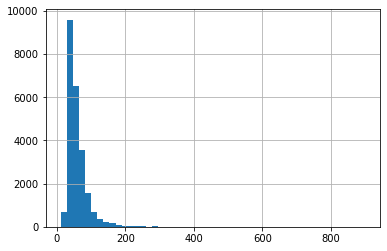

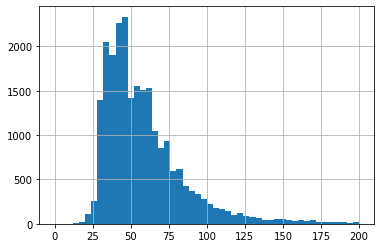

In [301]:
df['total_area'].hist(bins=50); # гистограмма площади квартиры
plt.show()
df['total_area'].hist(bins=50,range=(0,200));
plt.show()

In [302]:
df['total_area'].describe() # методом describe() получите характерные значения таблицы по столбцу total_area

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Из гистограммы видно, что площадь квартиры больше 175 кв.м — уже редки. Квартир больше 200 кв.м  почти нет. А на участке с площадью более 300 кв.м гистограмма сливается с нулём, это значит, что квартир с такой площадью единицы. Также максимальная площадь квартиры составляет 900 кв.м - что очень маловероятно, скорее всего это выброс.

Медиана равна 52 кв.м, среднее - 60 кв.м. 

##### Цена квартир:

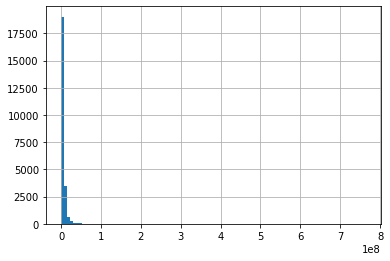

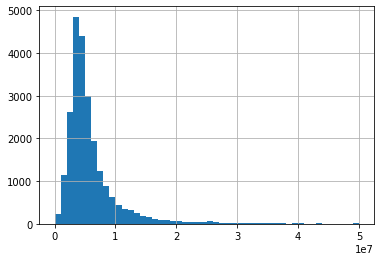

In [303]:
df['last_price'].hist(bins=100); # гистограмма цены квартир
plt.show()
df['last_price'].hist(bins=50, range=(0, 50000000));

In [304]:
df['last_price'].describe() # методом describe() получим характерные значения таблицы

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [305]:
df['last_price'].quantile([0.01, 0.5, 0.99]) # методом quantile() получим характерные значения для 1% и 99%

0.01     1000000.0
0.50     4650000.0
0.99    36000000.0
Name: last_price, dtype: float64

Стоимость квартиры больше 20 млн руб. уже редкость. Квартир стоимостью более 30 млн руб. еще меньше. А на участке со стоимостью квартир более 50 млн руб. гистограмма сливается с нулём, это значит, что квартир с такой стоимостью единицы.

Максимальное значение стоимости квартир составляет 763 млн руб, минимальное значение стоимости 12190 руб., что очень маловероятно. Максимально значение - это выбросы, минимальное значение - ошибка в данных.

Дополнительно нашли квантили 1% - 1 млн руб. Эти данные можно использовать для определения нижней границы среза по стоимости квартир.

##### Количество комнат:

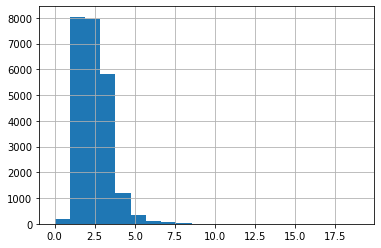

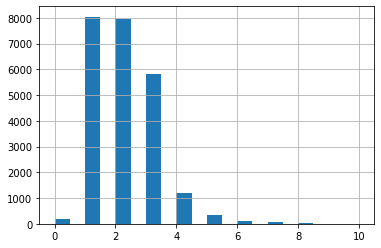

In [306]:
df['rooms'].hist(bins=20); # гистограмма количества комнат
plt.show()
df['rooms'].hist(bins=20, range=(0,10))
plt.show()

In [307]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

На гистограмме видно, что больше всего квартир с количеством комнат от 1 до 4. Больше 5 комнат бывает редко, а для квартир с количества комнат больше 8 гистограмма сливается с нулем, что говорит о том, что таких квартир единицы.

Квартир с количеством комнат 0 (квартиры-студии) также очень мало. 

Максимальное количество комнат в квартире - 19, это может быть коммунальная квартира (характерно для СпБ), которая продается целиком.

##### Высота потолков:

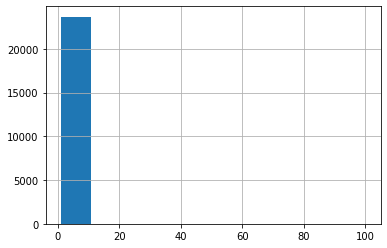

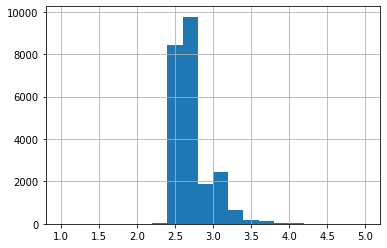

In [308]:
df['ceiling_height'].hist();  # гистограмма высоты потолков
plt.show()
df['ceiling_height'].hist(bins=20, range=(1, 5));
plt.show()

In [309]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.735910
std          0.994301
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [310]:
df['ceiling_height'].quantile([0.01, 0.5, 0.99])

0.01    2.50
0.50    2.65
0.99    3.60
Name: ceiling_height, dtype: float64

Из гистограммы видно, что в квартирах высота потолков от 2.5м до 3.3м. Большая часть значений высоты потолков лежит в диапазоне от 2.55 до 2.75 метров.
Высота потолка больше 3,5м встречается очень редко, а для квартир с высотой потолка больше 4.25м гистограмма сливается с нулем, что говорит о том, что таких квартир единицы. Также есть единичные квартиры с высотой потолка меньше 2.5м, это маловероятно и скорее всего такие значения являются выбросом. 

Есть очень сильные выбросы: минимальное значение равное 1, максимальное значение равное 100.

#### 4.2.  Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. 

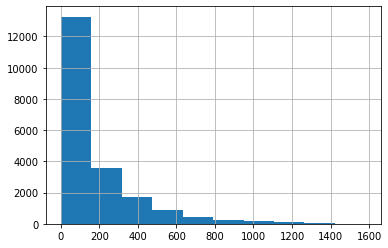

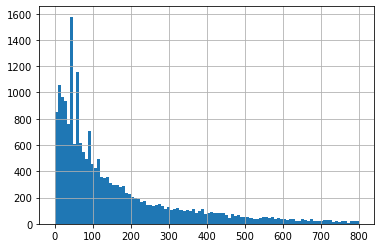

In [311]:
df['days_exposition'].hist();
plt.show()
df['days_exposition'].hist(bins=100, range=(0, 800));
plt.show()

In [312]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение времени продажи квартир составляет 180 дней, значение медианы равно 95 дней. Среднее значение почти в 2 раза больше медианы. Это говорит о том, что в распределении длинный хвост высоких значений, влияющих на среднее значение, но не на медиану.

Можно сказать, что в среднем продажа квартир занимает 95 дней (по значению медианы). Быстрыми продажами можно считать время продажи меньше 45 дней (по значению 25 процентиля), долгие продажи больше 232 дней (по значению 75 процентиля).


#### 4.3. Уберем редкие и выбивающиеся значения.

Для определения выбросов и редких значений используем диаграмму размаха boxplot()

##### Площадь квартир:

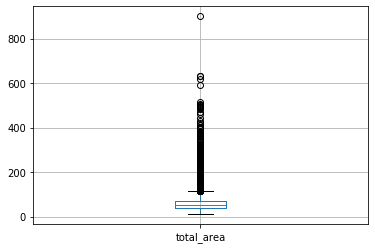

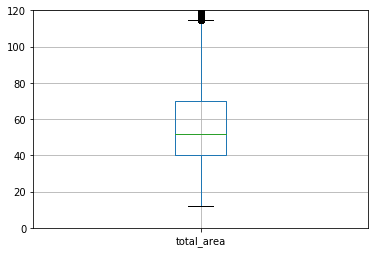

In [313]:
df.boxplot(column='total_area') # диаграмма размаха площади квартиры
plt.show()
df.boxplot(column='total_area')
plt.ylim(0, 120)
plt.show()

Для большинства квартир характерна площадь от 40 до 70 кв.м. Основная часть значений площади квартир лежит в диапазоне от 12 кв.м до 115 кв.м. Значения площади квартир больше 400 кв.м будем считать выбросами и исключим их из дальнейшего рассмотрения.

##### Цена квартир:

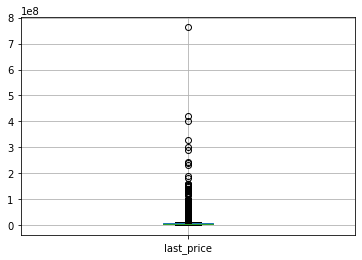

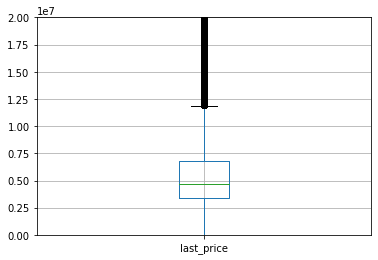

In [314]:
df.boxplot(column='last_price') # диаграмма размаха для цены квартиры
plt.show()
df.boxplot(column='last_price')
plt.ylim(0, 20000000)
plt.show()

Больше всего квартир с ценой от 3.4 до 6.8 млн руб. Основная часть квартир стоимостью до 12 млн руб. Квартиры больше 50 млн руб редкость. Также квартиры с очень низкой стоимостью меньше 1 млн руб будем считать выбросами.

##### Количество комнат:

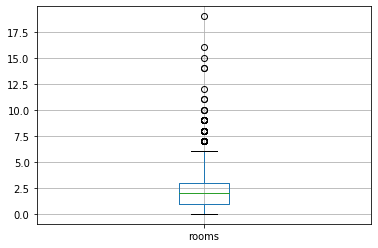

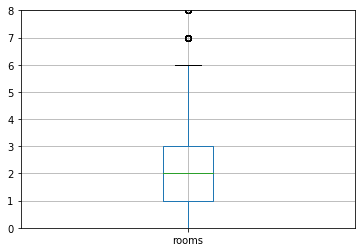

In [315]:
df.boxplot(column='rooms') # диаграмма размаха для количества комнат
plt.show()
df.boxplot(column='rooms') 
plt.ylim(0, 8)
plt.show()

У основная части квартир имеет от 0 до 6 комнат. Большая часть значений 'rooms' лежит в диапазоне от 1 до 3 комнат. В целом, квартиры с количеством комнат больше 8 можно считать редкими.

##### Высота потолков:

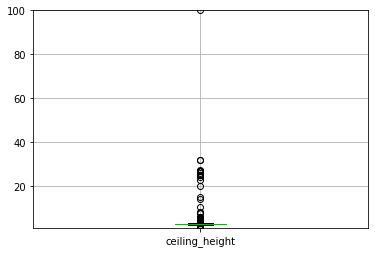

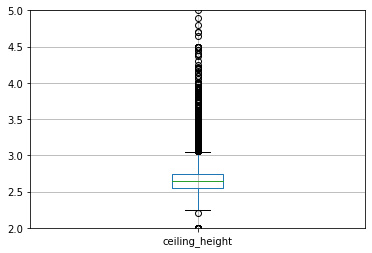

In [316]:
df.boxplot(column='ceiling_height') # диаграмма размаха для высоты потолков
plt.ylim(1, 100)
plt.show()
df.boxplot(column='ceiling_height')
plt.ylim(2, 5)
plt.show()

Большая часть значений высоты потолка лежит в диапазоне от 2.55м до 2.75м. Значения меньше 2.2м и больше 5.0м будем считать выбросами. 

##### Время продажи квартир:

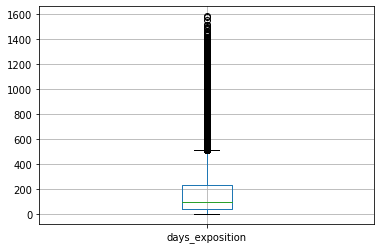

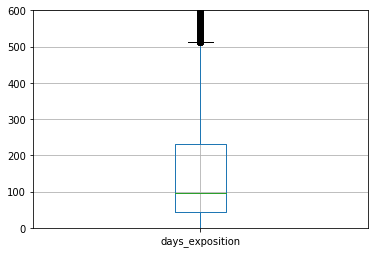

In [317]:
df.boxplot(column='days_exposition') # диаграмма размаха для высоты потолков
plt.show()
df.boxplot(column='days_exposition')
plt.ylim(0, 600)
plt.show()

Большая часть значений лежит в диапазоне от 45 до 232 дней. Значения больше 1400 дней являются редкими.

In [318]:
days_exposition = df.query('days_exposition < 1400')

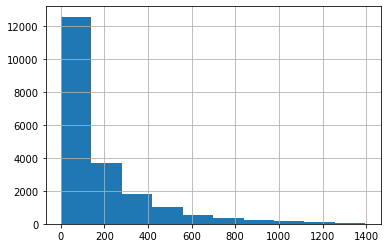

In [319]:
days_exposition['days_exposition'].hist();

Таким образом, для дальнейшего исследовательского анализа данных будем использовать срез данных с учетом следующих условий:

* площаль квартиры от 12 до 500 кв.м;
* стоимость квартиры от 1 до 50 млн руб;
* высота потолков от 2,2 до 5 м.

In [320]:
df_filt = df.query(
    'total_area >= 12 and total_area <= 500 and \
    last_price >= 1000000 and last_price <= 50000000 \
    and ceiling_height >=2.2 and ceiling_height <= 5.0' 
) 
df_filt

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,coeff_kitchen_area,cityCenters_nearest_km,price_for_m2,weekday,month,year,floor_group,living_area_ratio,kitchen_area_ratio,price_per_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,0.140928,16,120370.370370,3,3,2019,другой,0.472222,0.231481,812500
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60000,1,False,...,0.249906,18,82920.792079,1,12,2018,первый,0.460396,0.272277,186111
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30000,4,False,...,0.174163,13,92785.714286,3,8,2015,другой,0.612500,0.148214,399692
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00000,13,False,...,0.174163,8,100000.000000,1,6,2018,другой,0.320000,0.410000,1250000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40000,5,False,...,0.249906,100,95065.789474,0,9,2018,другой,0.473684,0.299342,28900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30000,3,False,...,0.140928,4,72490.845228,1,3,2017,другой,0.547792,0.103356,2425000
23695,14,3100000,59.00,2018-01-15,3,2.55,5,38.00000,4,False,...,0.140928,100,52542.372881,0,1,2018,другой,0.644068,0.144068,31000
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.70000,1,False,...,0.174163,100,44091.710758,6,2,2018,первый,0.523810,0.174163,25000
23697,13,11475000,76.75,2017-03-28,2,3.00,17,44.46025,12,False,...,0.174163,10,149511.400651,1,3,2017,другой,0.579287,0.303583,1147500


#### 4.4.  Какие факторы больше всего влияют на стоимость квартиры? 


##### 1). Изучим, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 

###### зависимость цены от квадратного метра:

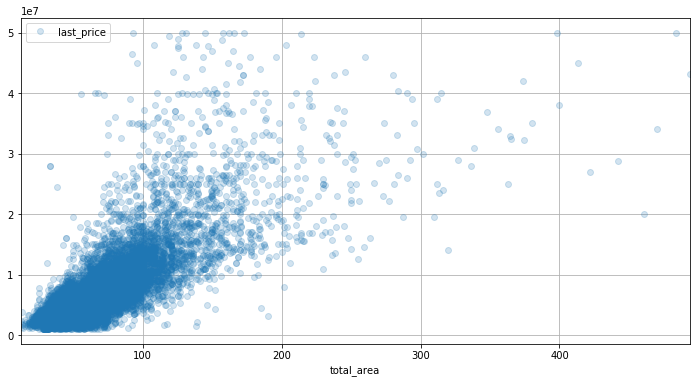

In [321]:
df_filt.plot(x = 'total_area', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.2);

In [322]:
df_filt['total_area'].corr(df_filt['last_price'])

0.7812277856108536

Из диаграммы рассеиния видно, что больше всего данных для квартир стоимостью до 20 млн и площадью до 125 кв.м.
Чем больше площадь квартиры, тем больше цена. Значение корреляции равно 0.78, что говорит о сильной зависимости.

###### зависимость цены от числа комнат:

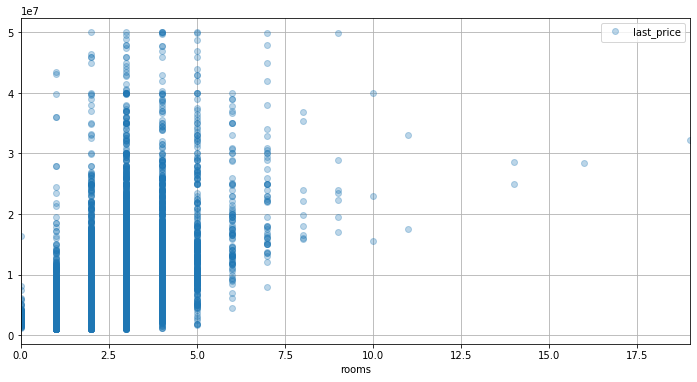

In [323]:
df_filt.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.3);

In [324]:
df_filt['rooms'].corr(df_filt['last_price'])

0.5096407720706438

С учеличение числа комнат 0 до 3 комнат стоимость квартир растет,от 3 до 5 комнат стоимость примерно одинаковая, от 5 до 7 комнат стоимоть уменьшается, а для квартри больше 8-ти комнатных стоимость квартир лежит примерно в одном диапазоне от 15 до 40 млн руб.

###### зависимость цены от удаленности от центра:

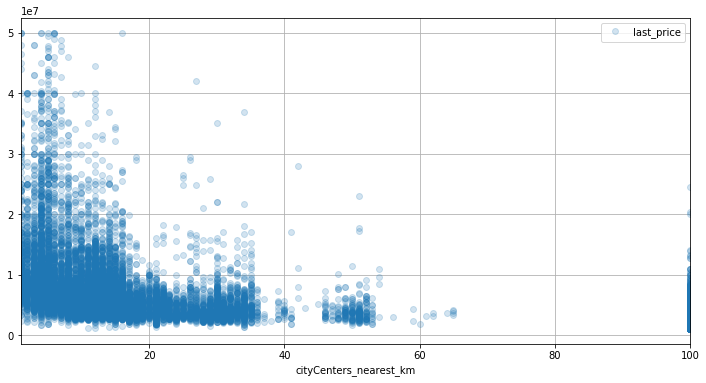

In [325]:
df_filt.plot(x = 'cityCenters_nearest_km', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.2);

In [326]:
df_filt['cityCenters_nearest_km'].corr(df_filt['last_price'])

-0.36481116837700983

Для квартир стоимостью до 10 млн руб стоимость квартир не зависит от расстояния до центра.
В диапазоне цен от 10 млн руб и больше, чем ближе квартира к центру, тем она дороже. 

(Примечание:*значения больше 100 км не рассматриваем, т.к. это значения-маркеры для пропусков)

##### 2) Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

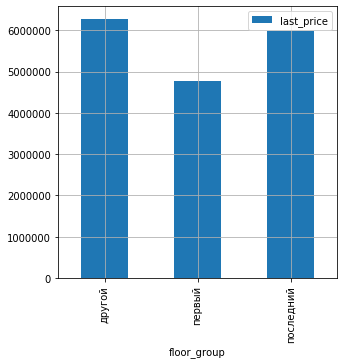

In [327]:
df_filt.pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True, figsize=(5, 5));


Самые низкие цены на квартиры на первом этаже. Квартиры на этажах последний и 'другой' примерно одинаковые по стоимости.

##### 3) Изучим зависимость от даты размещения: дня недели, месяца и года.

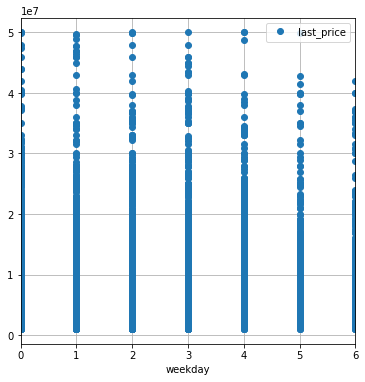

In [328]:
df_filt.plot(x = 'weekday', y = 'last_price', style='o', grid=True, figsize=(6, 6));

In [329]:
df_filt['weekday'].corr(df_filt['last_price'])

-0.014487688199620683

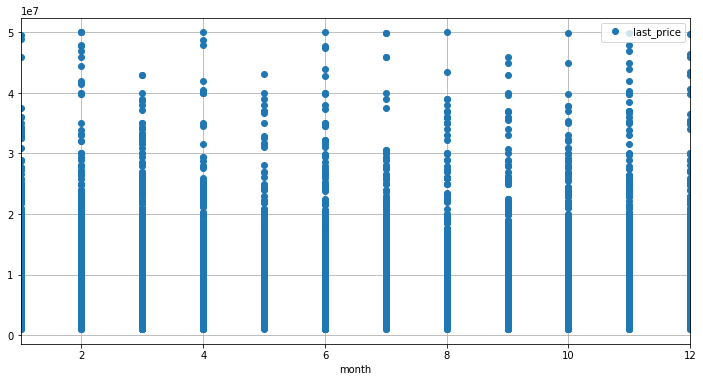

In [330]:
df_filt.plot(x = 'month', y = 'last_price', style='o', grid=True, figsize=(12, 6));

In [331]:
df_filt['month'].corr(df_filt['last_price'])

0.0024836891753626925

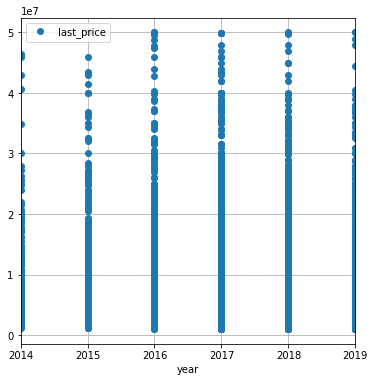

In [332]:
df_filt.plot(x = 'year', y = 'last_price', style='o', grid=True, figsize=(6, 6));

In [333]:
df_filt['year'].corr(df_filt['last_price'])

-0.04463216604269928

Зависимсоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует.
Коэффициенты корреляции отрицательные и близки к нулю.


#### 4.5.  Найдем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [334]:
locality_name_top_10 = df['locality_name'].value_counts().head(10).index # сохраним топ-10 населенных пунтов

In [335]:
df_for_top_10 = df_filt.query('locality_name in @locality_name_top_10')

In [336]:
(df_for_top_10
     .pivot_table(index='locality_name', values='price_for_m2', aggfunc='median')
     .sort_values(by= 'price_for_m2', ascending = False)
)
    # Топ-10 населенных пунктов по средней цене за кв.м квартир из топ-10

,price_for_m2
locality_name,
Санкт-Петербург,104545.454545
Пушкин,100000.000000
деревня Кудрово,91860.465116
поселок Парголово,91642.857143
поселок Мурино,85878.462169
поселок Шушары,76876.172608
Колпино,74723.748474
Гатчина,67924.528302
Всеволожск,65789.473684


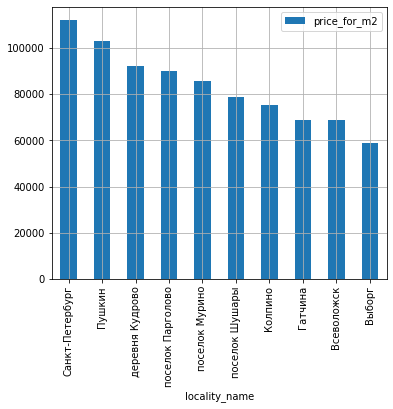

In [337]:
(df_for_top_10
     .pivot_table(index='locality_name', values='price_for_m2', aggfunc='mean')
     .sort_values(by= 'price_for_m2', ascending = False)
     .plot(kind='bar', grid=True, figsize=(6, 5))
);

In [338]:
df_for_top_10_max = (df_for_top_10
     .pivot_table(index='locality_name', values='price_for_m2', aggfunc='max')
     .sort_values(by= 'price_for_m2', ascending = False)
)
df_for_top_10_max

,price_for_m2
locality_name,
Санкт-Петербург,848484.848485
Всеволожск,640422.350472
Пушкин,256521.739130
поселок Шушары,147826.086957
Гатчина,146315.789474
деревня Кудрово,142857.142857
поселок Мурино,138580.246914
поселок Парголово,138522.427441
Колпино,125000.000000


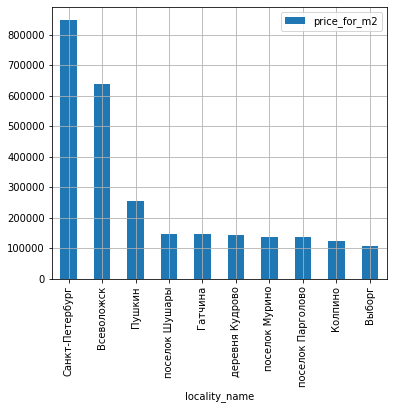

In [339]:
df_for_top_10_max.plot(kind='bar', grid=True, figsize=(6, 5));

In [340]:
df_for_top_10_min=(df_for_top_10
     .pivot_table(index='locality_name', values='price_for_m2', aggfunc='min')
     .sort_values(by= 'price_for_m2', ascending = False)
)
df_for_top_10_min

,price_for_m2
locality_name,
Пушкин,59836.065574
деревня Кудрово,54160.346696
поселок Мурино,50000.000000
Колпино,47957.371226
поселок Шушары,47700.416089
поселок Парголово,39205.955335
Всеволожск,31400.000000
Выборг,24324.324324
Санкт-Петербург,15345.268542


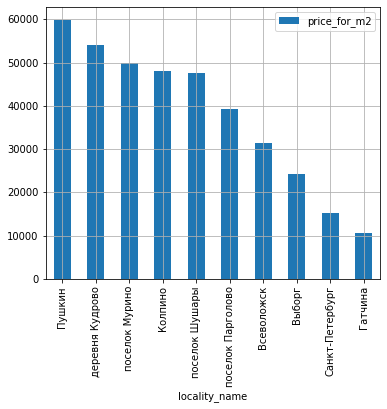

In [341]:
df_for_top_10_min.plot(kind='bar', grid=True, figsize=(6, 5));

Медианное (среднее) значение стоимости за кв.м больше всего в Санкт-Петербурге, меньше всех в Выборге.
Максимальная стоимость за кв.м у квартир в Санкт-Петербурге, минимальная в Гатчине.

Также Санкт-Петербург на 9 месте по минимальному значению стоимость за кв.м.


#### 4.6.  Выделим квартиры в Санкт-Петербурге, которые расположены в центре.

В шаге 2 и 3 мы посчитали расстояние до центра в км 'cityCenters_nearest_km' и среднюю цену для каждого км 'price_per_km'. Посторим график зависимости цены от расстояния до центра, там где график будет сильно меняться это и будет центральная часть Санкт-Петербурга

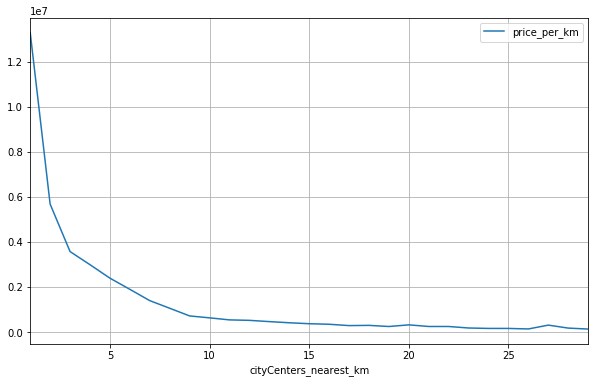

In [342]:
(df_filt
    .query('locality_name =="Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_per_km', aggfunc='mean')
    .plot(grid=True, figsize=(10, 6))
);

Из графика видно, что после 10 км цена не меняется. Центром Санкт-Петербурга будем считать расстояние до 10 км.


#### 6) Выделим сегмент квартир в центре Санкт-Петербурга. Проанализируем и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

Построим гистрограммы площади, цены, числа комнат и высоты потолков для центра Санкт-Петербурга и для всего города. Сравним полученные графики:

In [343]:
df_filt_spb = df_filt.query('locality_name == "Санкт-Петербург"')

In [344]:
df_filt_spb_center = df_filt.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <=10')

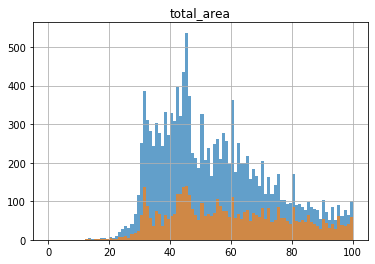

In [345]:
ax = df_filt_spb.hist('total_area', alpha = 0.7, bins = 100, range = (0,100))
df_filt_spb_center.hist('total_area', alpha = 0.7, bins = 100, range = (0,100),  ax = ax)
plt.show()

Для центра Санкт-Петербурге разброс значений площади квартир выражен не так сильно, как для всего города в целом.

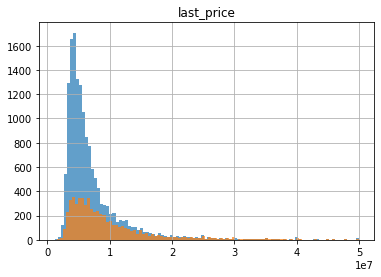

In [346]:
ax = df_filt_spb.hist('last_price', alpha = 0.7, bins = 100)
df_filt_spb_center.hist('last_price', alpha = 0.7, bins = 100,  ax = ax)
plt.show()

Частота встречи по стоимости квартир для центра Санкт-Петербурге имеет менее выроженный пик, чем для всего города в целом.

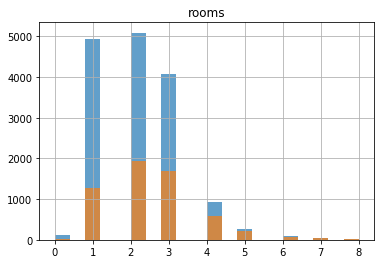

In [347]:
ax = df_filt_spb.hist('rooms', alpha = 0.7, bins = 20, range = (0,8))
df_filt_spb_center.hist('rooms', alpha = 0.7, bins = 20, range = (0,8),  ax = ax)
plt.show()

Частота встречи квартир в разным количеством комнат для центра Санкт-Петербурге и всего города не отличаются.

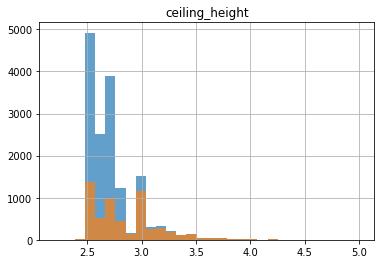

In [348]:
ax = df_filt_spb.hist('ceiling_height', alpha = 0.7, bins = 30, range = (2.2,5))
df_filt_spb_center.hist('ceiling_height', alpha = 0.7, bins = 30, range = (2.2,5),  ax = ax)
plt.show()

В центре Санкт-Петербурга наиболее чаще встречаются квартиры с высотой потолков 3 м, чем во всем городе.


#### 4.7.  Также выделим факторы, которые влияют на стоимость квартир в центре Санкт-Петербурга (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравним отличаются ли они от общих выводов по всему городу?

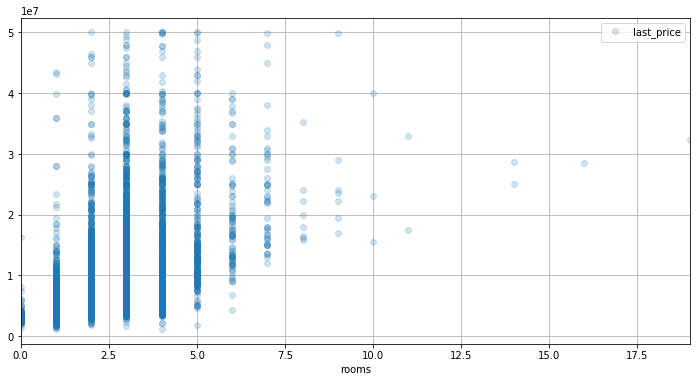

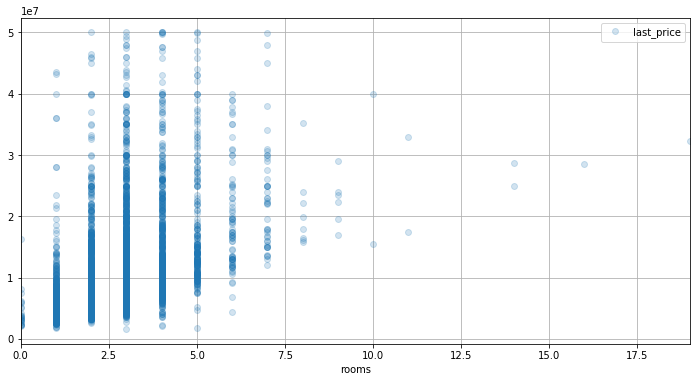

In [349]:
df_filt_spb.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.2);
df_filt_spb_center.plot(x = 'rooms', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.2);
    # первый график - весь СпБ
    # второй график - центр СпБ

In [350]:
df_filt_spb_center['rooms'].corr(df_filt['last_price'])

0.50696330847789

In [351]:
df_filt_spb['rooms'].corr(df_filt['last_price'])

0.5326474423725331

Различия в стоимости квартир от количества комнат центра Санкт-Петербурга и всего города в целом не отличаются.

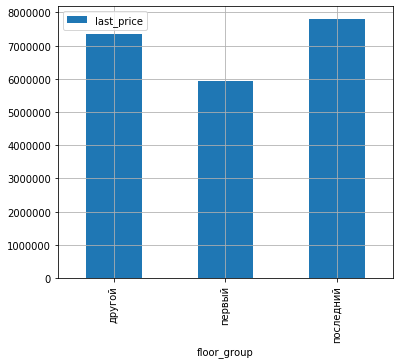

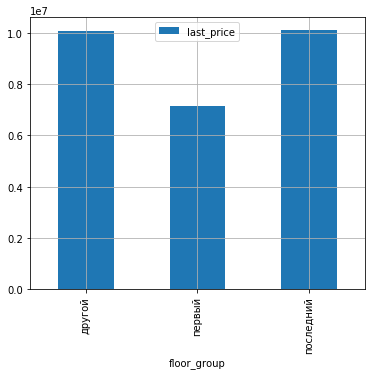

In [352]:
df_filt_spb.pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True, figsize=(6, 5));
df_filt_spb_center.pivot_table(index='floor_group', values='last_price').plot(kind='bar', grid=True, figsize=(6, 5));
    # первый график - весь СпБ
    # второй график - центр СпБ

Средняя стоимость квартир на первом этаже для центра СпБ также ниже других этажей, как для всего города в целом.

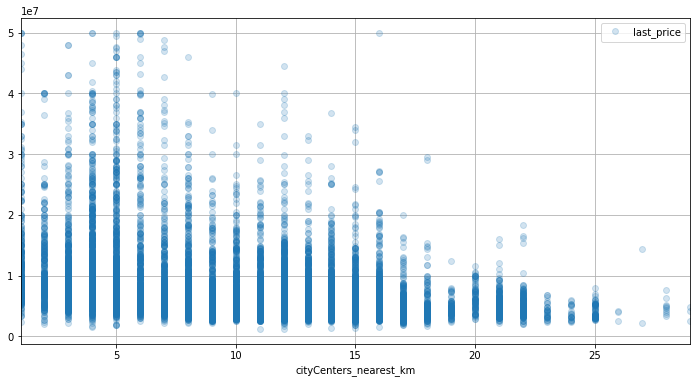

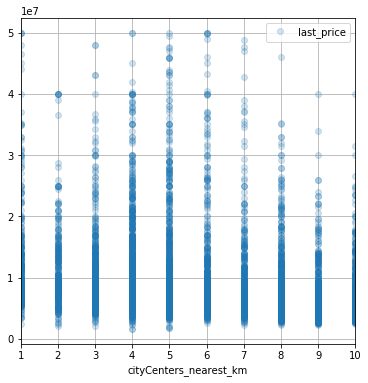

In [353]:
df_filt_spb.plot(x = 'cityCenters_nearest_km', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.2);
df_filt_spb_center.plot(x = 'cityCenters_nearest_km', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
    # первый график - весь СпБ
    # второй график - центр СпБ

In [354]:
df_filt_spb['cityCenters_nearest_km'].corr(df_filt['last_price'])

-0.3983141626555198

In [355]:
df_filt_spb_center['cityCenters_nearest_km'].corr(df_filt['last_price'])

-0.2996227682035156

Характерных различий между центром СпБ и всем городом нет. Для всего города после 17 км расстояние практически перестает влиять на стоимость.

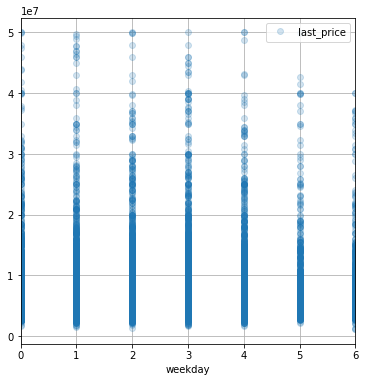

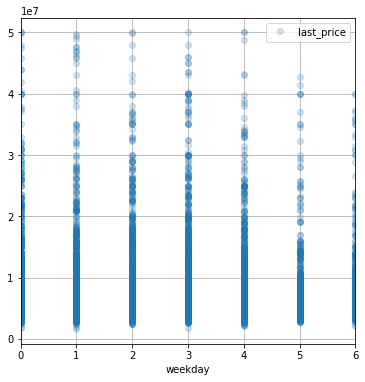

In [356]:
df_filt_spb.plot(x = 'weekday', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
df_filt_spb_center.plot(x = 'weekday', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
    # первый график - весь СпБ
    # второй график - центр СпБ

In [357]:
df_filt_spb['weekday'].corr(df_filt['last_price'])

-0.01271729162918904

In [358]:
df_filt_spb_center['weekday'].corr(df_filt['last_price'])

-0.024178703302608316

Зависимость между стоимостью квартиры и днем недели публикации объявления отсутствует для центра СпБ и всего города. Коэффициенты корреляции близки к нулю.

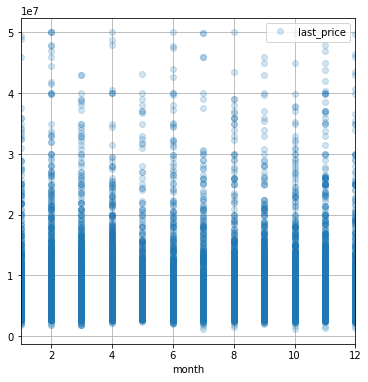

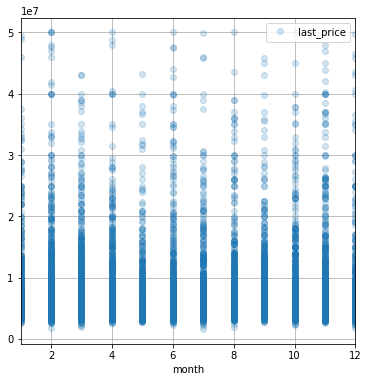

In [359]:
df_filt_spb.plot(x = 'month', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
df_filt_spb_center.plot(x = 'month', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
    # первый график - весь СпБ
    # второй график - центр СпБ

In [360]:
df_filt_spb['month'].corr(df_filt['last_price'])

-0.0027961474095521293

In [361]:
df_filt_spb_center['month'].corr(df_filt['last_price'])

0.00376107743993454

Зависимость между стоимостью квартиры и месяцем публикации объявления отсутствует для центра СпБ и всего города. Коэффициенты корреляции близки к нулю.

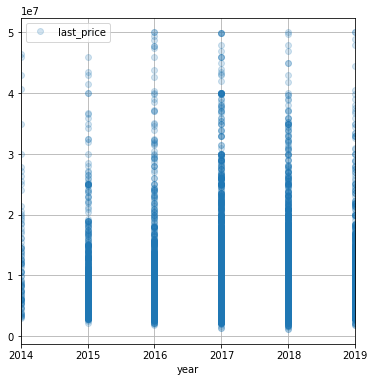

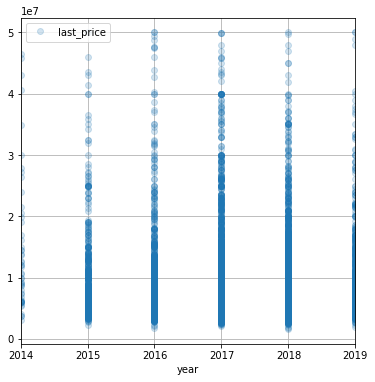

In [362]:
df_filt_spb.plot(x = 'year', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
df_filt_spb_center.plot(x = 'year', y = 'last_price', style='o', grid=True, figsize=(6, 6), alpha=0.2);
    # первый график - весь СпБ
    # второй график - центр СпБ

In [363]:
df_filt_spb['year'].corr(df_filt['last_price'])

-0.044078510142094005

In [364]:
df_filt_spb_center['year'].corr(df_filt['last_price'])

-0.05248858226111414

Зависимость между стоимостью квартиры и годом публикации объявления отсутствует для центра СпБ и всего города. Коэффициенты корреляции близки к нулю.

### Выводы_шаг 4:

1) Изучили следующие параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра.

2) Изучили время продажи квартиры и построили гистограмму. Посчитали среднее и медиану. Обычно продажа занимает 95 дней (по значению медианы). Быстрыми продажами можно считать время продажи меньше 45 дней (по значению 25 процентиля), долгие продажи больше 232 дней (по значению 75 процентиля). 

3) С вомощью диаграмм размаха определили редкие значения и выбросы. Выделили срез данных для последующего анализа: площаль квартиры от 12 до 500 кв.м; стоимость квартиры от 1 до 50 млн руб; высота потолков от 2,2 до 5 м.

4) Стоимость квартир больше всего зависит от площади и количества комнат. Меньше всего стоят квартиры на первом этаже, на других этажах и последнем стоимость примерно одинаковая. Стоимость квартиры не зависит от даты размещения (дня недели, месяца и года).

5) Определили Топ-10 населенных с наибольшим числом объявлений В Топ-10 попали следующие населенные пункты: 'Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово','Выборг'.
Рассчитали среднее значение стоимости квартир за кв. м. Медианное (среднее) значение стоимости за кв.м больше всего в Санкт-Петербурге, меньше всех в Выборге. Максимальная стоимость за кв.м у квартир в Санкт-Петербурге, минимальная в Гатчине. Также Санкт-Петербург на 9 месте по минимальному значению стоимость за кв.м.

6) Выделили квартиры в Санкт-Петербурге, по расстоянию до центра меньше 10 км.

7) Проанализировали центр Санкт-Петербурга и всего города по следующим параметрам: площадь, цена, число комнат, высота потолков. 
Получили следущие отличия: 
* Частота встречи по стоимости квартир для центра Санкт-Петербурге имеет менее выроженный пик, чем для всего города в целом.
* Для центра Санкт-Петербурге разброс значений площади квартир выражен не так сильно, как для всего города в целом. 
* В центре Санкт-Петербурга наиболее чаще встречаются квартиры с высотой потолков 3 м, чем во всем городе.

Также выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). В целом влияние на стоимость квартир данные для центра Санкт-Петербурга и всего города не отличается.

### Шаг 5. Общий вывод

В целом можно сделать вывод, что на рыночную стоимость квартир больше всего влияют следующие параметры:
* площаль квартиры (чем больше площадь, тем больше её стоимость);
* количество комнат (причем для квартир от 0 до 3х комнат эта зависимость сильнее);
* расстояние до центра (чем ближе квартира к центу, тем выше её стоимость);
* квартиры на первом этаже стоят меньше.

На стоимость квартир не влияет дата размещения объявления.